In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf
import math
import sklearn
from sklearn.metrics import mean_squared_error
import keras


In [7]:
df = pd.read_csv('SUNPHARMA.NS_5Y_1DAY_FROM_PERPLEXITY.csv')

In [9]:
print(df.head())

                        date   close    open    high     low      volume
0  2020-09-01T00:00:00+05:30  521.45  521.20  527.65  506.20  13861215.0
1  2020-09-02T00:00:00+05:30  514.50  523.50  525.60  509.20   9636649.0
2  2020-09-03T00:00:00+05:30  523.45  518.55  526.85  512.55  10052115.0
3  2020-09-04T00:00:00+05:30  512.45  518.00  530.40  508.25  12380218.0
4  2020-09-07T00:00:00+05:30  513.25  516.00  518.20  504.25   6320017.0


In [15]:
df1=df.reset_index()['close']
df1.head()

0    521.45
1    514.50
2    523.45
3    512.45
4    513.25
Name: close, dtype: float64

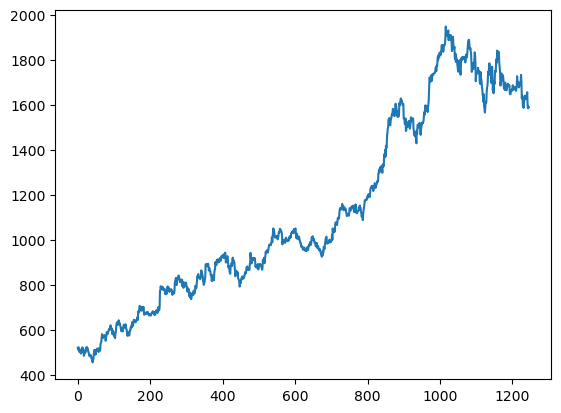

In [17]:
plt.plot(df1)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [21]:
print(df1)

[[0.04362247]
 [0.03896539]
 [0.04496264]
 ...
 [0.75675947]
 [0.76265621]
 [0.75890374]]


In [23]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [25]:
training_size,test_size

(809, 437)

In [33]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [35]:
time_step = 20
X_test, ytest = create_dataset(test_data, time_step)
X_train, y_train = create_dataset(train_data, time_step)

In [37]:
print(X_train.shape), print(y_train.shape)


(788, 20)
(788,)


(None, None)

In [39]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [41]:
model=Sequential()
model.add(LSTM(20,return_sequences=True,input_shape=(20,1)))
model.add(LSTM(20,return_sequences=True))
model.add(LSTM(20))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\chinm\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 20, 20)              │           1,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 20, 20)              │           3,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 20)                  │           3,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,341 (32.58 KB)

 Trainable params: 8,341 (32.58 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=60,batch_size=16,verbose=1)

Epoch 1/60
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 4.6613e-04 - val_loss: 0.0072
Epoch 2/60
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 5.2951e-04 - val_loss: 0.0069
Epoch 3/60
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 4.9253e-04 - val_loss: 0.0076
Epoch 4/60
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 3.8190e-04 - val_loss: 0.0085
Epoch 5/60
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 4.5118e-04 - val_loss: 0.0076
Epoch 6/60
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 4.2691e-04 - val_loss: 0.0079
Epoch 7/60
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 4.0570e-04 - val_loss: 0.0060
Epoch 8/60
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 4.5493e-04 - val_loss: 0.0050
Epoch 9/60
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 4.9467e-04 - val_loss: 0.0064
Epoch 10/60
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 3.9545e-04 - val_loss: 0.0055
Epoch 11/60
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 4.1601e-04 - val_loss: 0.0041
Epoch 12/60
50/50 ━

In [61]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [63]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [65]:
math.sqrt(mean_squared_error(y_train,train_predict))

881.537965942347

In [67]:
math.sqrt(mean_squared_error(ytest,test_predict))

1666.4024958877367

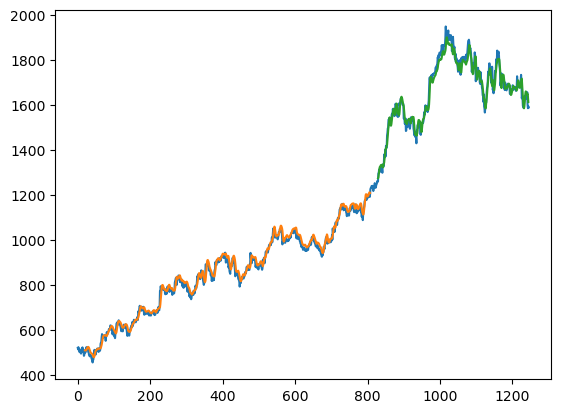

In [69]:
look_back=20
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
start = len(train_predict) + (look_back * 2) + 1
end = start + len(test_predict)
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
start = len(train_predict) + (look_back * 2) + 1
end = min(start + len(test_predict), testPredictPlot.shape[0])
testPredictPlot[start:end, :] = test_predict[:end - start]
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()